---
title: "Assignment-1"
subtitle: "CSCI- 5922 Dr. Ami Gates"
author: "Venkata Harshith Nikhil Samudrala"
date: "2024-09-16"
format:
    docx:
        echo: false
        toc: true
        toc-depth: 4       
---

**Q1) Create your own small, 3D, labeled dataset. Your labels should be binary. Save your dataset as A1_Data_YourName.csv. You will be submitting this raw dataset with your Assignment. A 3D dataset has three columns (variables/features). The label will be in the 4th column. Recall that labels are not part of the dataset but rather are the categories (also called classes or groups) that each data row (example, observation) is a member of.**

In [1]:
#| echo: false
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#| echo: false
data=pd.read_csv('A1_Data_VenkataHarshithNikhil.csv')
data

,years_since,product_satisfaction,service_satisfaction,retained
0,7,2,6,0
1,4,1,1,0
2,8,7,9,1
3,5,7,6,1
4,7,8,3,0
5,10,5,4,0
6,3,3,4,0


The above is the dataset that shos the retention of customer based on the rating they gave on a certain product and the service provided by the company.

The feautres are:
- *years_since*: No.of Years since being a customer
- *product_satisfaction*: Out of 10 Rating on the product
- *service_satisfaction*: Out of 10 Rating on the service provided by the company
- *retained*: This is the label of the dataset. 0 means the customer was not retained and 1 means that the customer stayed.

**2) (a) Write out a general linear equation (call it z) to represent a linear function that multiplies individual weights by each x value.** 

For a 4D dataset, a general linear equation is:

**$$ z = w_1 \cdot x_1 + w_2 \cdot x_2 + w_3 \cdot x_3 + b $$**

For the given data:
$$ z= w_1 \cdot years\_since + w_2 \cdot product\_satisfaction + w_3 \cdot service\_satisfaction + b $$

Here in the above equation:
- *z* - This is the output of the linear expression (model).
- *x1, x2, x3* are the features, year_since, product_satisfaction, service_satisfaction. 
- *b* - This is the bias that is applied to the expression which offsets the linear expression.

**2(b) Write your linear equation using vector format. 
Example:
z = wTx + b**

In [3]:
#| echo: false
X_mat= data[['years_since', 'product_satisfaction', 'service_satisfaction']].to_numpy()
X_mat

array([[ 7,  2,  6],
       [ 4,  1,  1],
       [ 8,  7,  9],
       [ 5,  7,  6],
       [ 7,  8,  3],
       [10,  5,  4],
       [ 3,  3,  4]])

Consider all the weights to be 1 and the bias ‘b’ be equal to 0. Then the vector format would be,

Z =
[[ 7 2 6 ]

 [ 4 1 1 ]
 
 [ 8 7 9 ]
 
 [ 5 7 6 ]     X         [1, 1, 1]  + 0
                         
 [ 7 8 3 ]
 
 [ 10 5 4]
 
 [ 3 3 4 ]]
          (7x3)  

Here, $$z = w^T \cdot X+b$$

Here, The matrix is X, the weights are all 1s with b=0.

**2(c) What do the w values represent?**


The values ‘w’ are the coefficients that are associated with the features labeled as X. These weights represent the significance of each feature. These weights are the parameters that are learned during the training to best fit the data. 


**2(d) What does the "b" represent?**
The ‘b’ is called the bias or the intercept. This helps in fitting the model a bit better independent of the input features by helping in offsetting. This can be helpful in cases like when input alone is not able to predict the output.

**3) Use Python to read in your dataset and to plot the data (not the label) in 3D.**

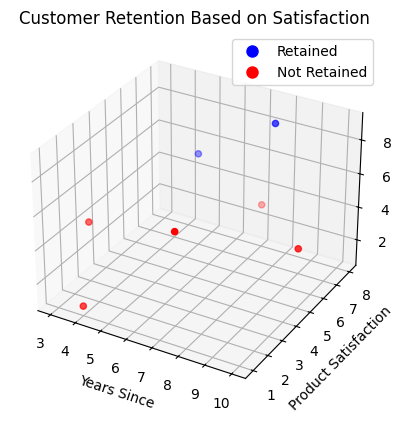

In [4]:
#| echo: false
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = {0: 'r', 1: 'b'}
ax.scatter(data['years_since'], data['product_satisfaction'], data['service_satisfaction'],
           c=data['retained'].map(colors), label=data['retained'])

ax.set_xlabel('Years Since')
ax.set_ylabel('Product Satisfaction')
ax.set_zlabel('Service Satisfaction')
ax.set_title('Customer Retention Based on Satisfaction')
retained_labels = [plt.Line2D([0], [0], marker='o', color='w', label='Retained', markerfacecolor='b', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Not Retained', markerfacecolor='r', markersize=10)]
ax.legend(handles=retained_labels)

plt.show()

**4) Does your dataset appear to have clusters or groups? Does it appear to be separable - especially with respect to your labeling?**

Yes, The data looks linearly separable as observed from the 3D plot.

**5) (a) Write out the Sigmoid function - include both ways to write it.** 

$$
\sigma = \frac{1}{1+e^{-x}}
$$

This can also be written as:

$$
\sigma = \frac{e^{x}}{1+e^{x}}
$$

**(b) Prove that 1/ (1 + e^-x) is the same as e^x / ( 1 + e^x) are the same. Show all steps carefully.**

We know that, 
$$\sigma = \frac{1}{1+e^{-x}} \quad \& \quad \sigma = \frac{e^x}{1+e^x}$$
So to prove, 
$$\frac{1}{1+e^{-x}} = \frac{e^x}{1+e^x}$$
Considering the Right Hand Side of the above Equation:
Multiply e^-x on both numerator and denominator:
$$= \frac{e^x \cdot e^{-x}}{(1+e^x)\cdot e^{-x}} $$
$$= \frac{e^{x-x}}{e^{x-x} + e^{-x}} $$
$$= \frac{e^0}{e^0 + e^{-x}} $$
$$= \frac{1}{1+e^{-x}}$$

**(c) Use Python to create a plot (from -100 to 100 with steps of 1) of the Sigmoid function. Include the plot here.**

<Figure size 800x600 with 0 Axes>

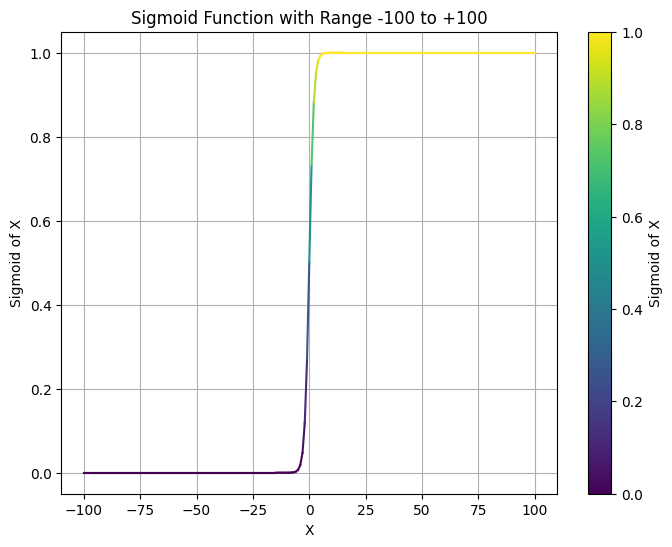

In [5]:
#| echo: false
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x_val = np.arange(-100, 101, 1)
y_val = sigmoid(x_val)
plt.figure(figsize=(8,6))
norm = plt.Normalize(vmin=0, vmax=1)
cmap = plt.cm.viridis
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(len(x_val)-1):
    ax.plot(x_val[i:i+2], y_val[i:i+2], color=cmap(norm(y_val[i])))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm, ax=ax, label="Sigmoid of X")
ax.set_title('Sigmoid Function with Range -100 to +100')
ax.set_xlabel('X')
ax.set_ylabel('Sigmoid of X')
ax.grid(True)
plt.show()

**(d) Let  S(z) = 1 / (1 + e^-z) be the Sigmoid function. Prove that the first derivative of S(z) is S(z) X (1 - S(z)). 
 Show every step carefully**

Given:
$$S(z) = \frac{1}{1 + e^{-z}}$$
Differentiate \(S(z)\) with respect to \(z\):
$$\frac{d(S(z))}{dz} = \frac{d}{dz} \left( \frac{1}{1 + e^{-z}} \right)$$
Using the quotient rule:
$$= \frac{0 \cdot (1 + e^{-z}) - 1 \cdot (-e^{-z})}{(1 + e^{-z})^2}$$
Simplify the expression:
$$= \frac{-(-e^{-z})}{(1 + e^{-z})^2}$$
$$= \frac{e^{-z}}{(1 + e^{-z})^2}$$
Further simplification:
$$= \frac{e^{-z} + 1 - 1}{(1 + e^{-z})^2}$$
$$= \frac{(1+e^{-z})}{(1 + e^{-z})^2} - \frac{1}{(1 + e^{-z})^2}$$
$$= \frac{1}{1 + e^{-z}} - \frac{1}{(1 + e^{-z})^2}$$
Factor the common term:
$$= \frac{1}{1 + e^{-z}} \left( 1 - \frac{1}{1 + e^{-z}} \right)$$
Therefore:
$$\frac{d(S(z))}{dz} = S(z) \cdot (1 - S(z))$$

**6) Using your dataset and an initial weight vector of all ones, an initial b value of 0, do the following. (Before you start, be sure to convert your labels to 0 and 1. For example, if my labels are POS and NEG, then I can change all POS to 1 and all NEG to 0. )**

**(a) What is your weight vector? Show it here. (You can draw it if you wish)**

There are three input features, so, the the shape of the weight vector would be (1, 3) for the first input layer, considering that there are no other hidden layers and a single output layer. The vector of the weights is [1, 1, 1] and the bias b=0.

**b) Create a value for your weight vector  - use all ones and use "0" for your b. Calculate z for all of your data. Show every step and do this by hand.** 

Given:

$$
X = \begin{bmatrix} 
7 & 2 & 6 \\
4 & 1 & 1 \\
8 & 7 & 9 \\
5 & 7 & 6 \\
7 & 8 & 3 \\
10 & 5 & 4 \\
3 & 3 & 4 
\end{bmatrix}, \quad w = \begin{bmatrix} 1 & 1 & 1 \end{bmatrix}, \quad b = 0
$$
We need to compute:
$$z = X \cdot w^T + b$$

Step: Min-Max Scaling Formula

The Min-Max scaling formula for each element in the matrix is:


$$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

Here:
- *X'* is the scaled feature,
- *X*  is the original feature value,
- *X\_min* is the minimum value in the column,
- *X\_max* is the maximum value in the column.

Step: Min and Max Values for Each Column of (X)

For the matrix (X), we compute the minimum and maximum values for each column:

- For the first column: $$( X_{min,1} = 3 ), ( X_{max,1} = 10 )$$
- For the second column: $$( X_{min,2} = 1 ), ( X_{max,2} = 8 )$$
- For the third column: $$( X_{min,3} = 1 ), ( X_{max,3} = 9 )$$


Step: Scaled Matrix

The scaled matrix ( X') is:

$$ X' = \begin{bmatrix} 
0.571 & 0.143 & 0.625 \\
0.143 & 0 & 0 \\
0.714 & 0.857 & 1 \\
0.286 & 0.857 & 0.625 \\
0.571 & 1 & 0.25 \\
1 & 0.571 & 0.375 \\
0 & 0.286 & 0.375 
\end{bmatrix} $$


For the weight vector w:

$$w^T = \begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix}$$



Step: Compute z

$$z = \begin{bmatrix} 
0.571 & 0.143 & 0.625 \\
0.143 & 0 & 0 \\
0.714 & 0.857 & 1 \\
0.286 & 0.857 & 0.625 \\
0.571 & 1 & 0.25 \\
1 & 0.571 & 0.375 \\
0 & 0.286 & 0.375 
\end{bmatrix} \cdot \begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix}
$$

Step: Summing the Products for Each Row


$$
z = \begin{bmatrix}
(0.571 + 0.143 + 0.625) \\
(0.143 + 0 + 0) \\
(0.714 + 0.857 + 1) \\
(0.286 + 0.857 + 0.625) \\
(0.571 + 1 + 0.25) \\
(1 + 0.571 + 0.375) \\
(0 + 0.286 + 0.375)
\end{bmatrix}
$$

Step 8: Final Computation

$$
z = \begin{bmatrix} 
1.339 \\
0.143 \\
2.571 \\
1.768 \\
1.821 \\
1.946 \\
0.661 
\end{bmatrix}
$$

**c)Once you have your z values, apply the Sigmoid function to each and show your y^ = S(z) vector. Do this by hand and show every step.**

$$S(z) = \frac{1}{1 + e^{-z}}$$

Given:
$$z = \begin{bmatrix} 1.339 \\0.143 \\2.571 \\1.768 \\1.821 \\1.946 \\ 0.661 \end{bmatrix}$$

Step-by-step calculation:

1. For (z_1 = 1.339):
$$S(1.339) = \frac{1}{1 + e^{-1.339}} \approx 0.792$$

2. For ( z_2 = 0.143 ):
$$S(0.143) = \frac{1}{1 + e^{-0.143}} \approx 0.536$$

3. For( z_3 = 2.571):
$$S(2.571) = \frac{1}{1 + e^{-2.571}} \approx 0.929$$

4. For ( z_4 = 1.768 ):
$$S(1.768) = \frac{1}{1 + e^{-1.768}} \approx 0.855$$

5. For (z_5 = 1.821):

$$S(1.821) = \frac{1}{1 + e^{-1.821}} \approx 0.860$$

6. For (z_6 = 1.946):
$$S(1.946) = \frac{1}{1 + e^{-1.946}} \approx 0.875$$

7. For (z_7 = 0.661):
$$S(0.661) = \frac{1}{1 + e^{-0.661}} \approx 0.659$$

Final Result:

The values of (S(z)), rounded to 3 decimal places, are:

$$S(z) = \begin{bmatrix} 0.792 \\0.536 \\0.929 \\0.855 \\0.860 \\0.875 \\0.659 \end{bmatrix}$$


**d) Are your current parameters (w and b) doing a good job predicting the correct labels? Show the correct label (y) and the predicted label (y^). How many are incorrect?  (Note that y^ is pronounced as y hat and is the value predicted by applying the Sigmoid to the linear equation). Show all of your work.** 

No, the current parameters (w = [1, 1, 1] and b=0) are doing a very poor job in predicting the values of y. Considering the threshold =0.5 too, 
the $$S(z) = \hat{y} = \begin{bmatrix} 0.792 \\0.536 \\0.929 \\0.855 \\0.860 \\0.875 \\0.659 \end{bmatrix}$$
and $$ y = \begin{bmatrix}0 \\ 0 \\ 1 \\ 1 \\ 0 \\ 0 \\ 0\end{bmatrix}$$

So according to the S(z) we calculated,  $$ \hat{y} = \begin{bmatrix}1 \\ 1 \\1 \\ 1 \\ 1 \\1 \\1\end{bmatrix}$$
The accuracy is around 29% approximately. As only 2 predictions are correct.

**7) (a) Write out the cross-entropy function for binary labels here.
LCE (y, y^) = ??
NOTE: Let's use the average Binary Cross Entropy function here - so you will have a 1/n term. As you have seen, there are a few representations of cross entropy for binary labels.** 

The function that is used to calculate the Loss pertaining to a single training example is:
$$L_{CE}(\hat{y}, y) =- [(y*\log{\hat{y}}) + (1-y)*(\log{1-\hat{y}})] $$
The cost junction J(w,b) would be calculated as:
$$J(w,b)= -\frac{1}{m} \cdot \sum_{i=1}^{m} [(y_i*\log{\hat{y_i}}) + (1-y_i)*(\log{1-\hat{y_i}})] ) $$

Here:
- **m**: The no.of training records
- **y\_i**: ith true label
- **y^\_i**: ith predicted label

Here, the Value of J(w,b) is calculated for the complete dataset. The Loss for every element is computed, summed and then based on the total no.of training examples it is averaged to get J.

**(b) For all of your data rows, calculate the LCE. Show all of your work and do this by hand. Include ALL steps. Continue to use the weight vector of all ones and a b of 0.**

Given:
$$y = \begin{bmatrix} 0 \\0 \\1 \\1 \\0 \\0 \\ 0\end{bmatrix} \quad 
\hat{y} = \begin{bmatrix} 0.792 \\0.536 \\0.929 \\0.855 \\0.860 \\0.875 \\ 0.659\end{bmatrix}$$

Binary Cross Entropy Loss (LCE) formula:

$$L_{CE}(y, \hat{y}) = - \left[ y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \right]$$

Step-by-step calculation:

1. **For the first element** $$(y_1 = 0, \hat{y}_1 = 0.792)$$:
$$L_{CE_1} = - \left( 0 \cdot \log(0.792) + (1 - 0) \cdot \log(1 - 0.792) \right) = - \log(1 - 0.792) = - \log(0.208) \approx 1.571$$

2. **For the second element** $$(y_2 = 0, \hat{y}_2 = 0.536)$$:
$$L_{CE_2} = - \left( 0 \cdot \log(0.536) + (1 - 0) \cdot \log(1 - 0.536) \right) = - \log(1 - 0.536) = - \log(0.464) \approx 0.768$$

3. **For the third element** $$(y_3 = 1, \hat{y}_3 = 0.929)$$:
$$L_{CE_3} = - \left( 1 \cdot \log(0.929) + (1 - 1) \cdot \log(1 - 0.929) \right) = - \log(0.929) \approx 0.074$$

4. **For the fourth element** $$(y_4 = 1, \hat{y}_4 = 0.855)$$:
$$L_{CE_4} = - \left( 1 \cdot \log(0.855) + (1 - 1) \cdot \log(1 - 0.855) \right) = - \log(0.855) \approx 0.157$$

5. **For the fifth element** $$(y_5 = 0, \hat{y}_5 = 0.860)$$:
$$L_{CE_5} = - \left( 0 \cdot \log(0.860) + (1 - 0) \cdot \log(1 - 0.860) \right) = - \log(1 - 0.860) = - \log(0.140) \approx 1.966$$

6. **For the sixth element** $$(y_6 = 0, \hat{y}_6 = 0.875)$$:
$$L_{CE_6} = - \left( 0 \cdot \log(0.875) + (1 - 0) \cdot \log(1 - 0.875) \right) = - \log(1 - 0.875) = - \log(0.125) \approx 2.079$$

7. **For the seventh element** $$(y_7 = 0, \hat{y}_7 = 0.659)$$:
$$L_{CE_7} = - \left( 0 \cdot \log(0.659) + (1 - 0) \cdot \log(1 - 0.659) \right) = - \log(1 - 0.659) = - \log(0.341) \approx 1.076$$

Calculate the total loss:

The total loss is the sum of all individual losses:
$$L_{total} = 1.571 + 0.768 + 0.074 + 0.157 + 1.966 + 2.079 + 1.076 = 7.691$$

Since there are 7 elements, the average loss is:
$$J(w, b) = \frac{L_{total}}{7} = \frac{7.691}{7} \approx 1.099$$

$$J(w, b) \approx 1.099$$

**c) Using your result from (b), what would you say your current "Loss" or "error" is? How might you improve/reduce this? What does it mean if the LCE is 0?**

The J(w,b) = 1.099 which is a bad indicator, meaning that the weights used were not a good fit for the model. This needs to be improved and the loss must be approacing 0 to coclude that a given set of parameters are best fit for the model. The model has the best parameters if the Loss or error is 0. For finding the optimum parameters the gradient descent function must be used to iteratively find the parameters that minimize the error or loss.

**8) To reduce the error (or loss), we need to adjust (change) the parameters. Recall that in this case, our parameters are w and b. If we change the values of w and/or b, this will result in a change in the LCE and in the overall difference between y^ and y. 
Do this by hand. Change your w to values other than 1. Leave b as 0. Recalculate LCE. 
Show every step and all of your work. Do this by hand. Your w values are invented by you.**

The new values to be considered $$w = \begin{bmatrix} 0.2 & 0.3 & 0.6 \end{bmatrix}, \quad b = 0$$

The scaled matrix $$ X' = \begin{bmatrix} 
0.571 & 0.143 & 0.625 \\
0.143 & 0 & 0 \\
0.714 & 0.857 & 1 \\
0.286 & 0.857 & 0.625 \\
0.571 & 1 & 0.25 \\
1 & 0.571 & 0.375 \\
0 & 0.286 & 0.375 
\end{bmatrix} $$

Compute (z)

Step: Compute (z)

We compute $$z = w^T X' + b$$

For the weight vector w:

$$w^T = \begin{bmatrix} 0.2 \\ 0.3 \\ 0.6 \end{bmatrix}$$

$$z = \begin{bmatrix} 
0.571 & 0.143 & 0.625 \\
0.143 & 0 & 0 \\
0.714 & 0.857 & 1 \\
0.286 & 0.857 & 0.625 \\
0.571 & 1 & 0.25 \\
1 & 0.571 & 0.375 \\
0 & 0.286 & 0.375 \end{bmatrix} \cdot \begin{bmatrix} 0.2 \\ 0.3 \\ 0.6 \end{bmatrix}$$
$$z = \begin{bmatrix}0.5321 \\0.0286 \\0.9999 \\0.6893 \\0.5642 \\0.5963 \\0.3108\end{bmatrix}$$

Apply the sigmoid function:
$$S(z) = \frac{1}{1 + e^{-z}}$$

1. For z_1 = 0.5321:
$$S(z_1) = \frac{1}{1 + e^{-0.5321}} = \frac{1}{1 + e^{-0.5321}} \approx \frac{1}{1 + 0.587} \approx \frac{1}{1.587} \approx 0.630$$

2. For z_2 = 0.0286:
$$S(z_2) = \frac{1}{1 + e^{-0.0286}} = \frac{1}{1 + e^{-0.0286}} \approx \frac{1}{1 + 0.972} \approx \frac{1}{1.972} \approx 0.507$$

3. For z_3 = 0.9999:
$$S(z_3) = \frac{1}{1 + e^{-0.9999}} = \frac{1}{1 + e^{-0.9999}} \approx \frac{1}{1 + 0.368} \approx \frac{1}{1.368} \approx 0.731$$

4. For  z_4 = 0.6893:
$$S(z_4) = \frac{1}{1 + e^{-0.6893}} = \frac{1}{1 + e^{-0.6893}} \approx \frac{1}{1 + 0.502} \approx \frac{1}{1.502} \approx 0.666$$

5. For z_5 = 0.5642:
$$S(z_5) = \frac{1}{1 + e^{-0.5642}} = \frac{1}{1 + e^{-0.5642}} \approx \frac{1}{1 + 0.569} \approx \frac{1}{1.569} \approx 0.637$$

6. For  z_6 = 0.5963:
$$S(z_6) = \frac{1}{1 + e^{-0.5963}} = \frac{1}{1 + e^{-0.5963}} \approx \frac{1}{1 + 0.551} \approx \frac{1}{1.551} \approx 0.644$$

7. For  z_7 = 0.3108:
$$S(z_7) = \frac{1}{1 + e^{-0.3108}} = \frac{1}{1 + e^{-0.3108}} \approx \frac{1}{1 + 0.733} \approx \frac{1}{1.733} \approx 0.578$$

$$S(z) = \begin{bmatrix}0.630 \\0.507 \\0.731 \\0.666 \\0.637 \\0.644 \\0.578\end{bmatrix}$$

Compute Loss

The actual labels (y) are:
$$y = \begin{bmatrix} 0 \\0 \\1 \\1 \\0 \\0 \\0\end{bmatrix}$$


$$L_{CE}(y, \hat{y}) = - \left[ y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \right]$$

For each element,the loss:

$$1. L_{CE_1} = - (0 \cdot \log(0.630) + (1 - 0) \cdot \log(1 - 0.630)) = - \log(0.370) \approx 0.995$$

$$2. L_{CE_2} = - \log(1 - 0.507) = - \log(0.493) \approx 0.707$$

$$3. L_{CE_3} = - \log(0.731) \approx 0.314$$

$$4. L_{CE_4} = - \log(0.666) \approx 0.406$$

$$5. L_{CE_5} = - \log(1 - 0.637) = - \log(0.363) \approx 1.014$$

$$6. L_{CE_6} = - \log(1 - 0.644) = - \log(0.356) \approx 1.032$$

$$7. L_{CE_7} = - \log(1 - 0.578) = - \log(0.422) \approx 0.863$$

The total loss is:
$$L_{total} = 0.995 + 0.707 + 0.314 + 0.406 + 1.014 + 1.032 + 0.863 = 5.331$$

The average loss is:
$$J(w, b) = \frac{L_{total}}{7} = \frac{5.331}{7} \approx 0.762$$

$$J(w, b) \approx 0.762$$

The new weights had only a loss of 0.762. Comparativlely these new parameters fit better to the model.

**9) To make changes to parameters, such as w and b so that we get closer and closer to the minimum (in other words to optimize the values of w and b) we need to take the partial derivatives of LCE with respect to both w and b. The Jacobian is a vector or matrix that contains all partial derivatives of a function with respect to all possible parameters. Here, our Jacobian has two values, one for dLCE/dw and one for dLCE/db, where "d" here is partial derivative.**

**(a) Find the partial derivative of the LCE with respect to w. Show all steps and work and use the chain rule. HINT (chain rule): dLCE/dw = dLCE/dy^ * dy^/dz * dz/dw
HINT2: The two derivatives are:
dLCE/dw = 1/n (y^-y)Tx
dLCE/db = 1/n (y^-y)
Note: Here again, we see the 1/n term because we are using the average binary cross entropy loss.**

LCE (Binary Cross Entropy Loss) is given by:

$$L_{CE} = - \frac{1}{m} \sum_{1}^{m} [y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y})]$$

Where:
$$\hat{y} = S(z) = \frac{1}{1 + e^{-z}}$$
and,
$$z = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b$$

Derivation  of $$\frac{\partial L_{CE}}{\partial \hat{y}}$$

$$\frac{\partial L_{CE}}{\partial \hat{y}} = \frac{\partial}{\partial \hat{y}} \left( - \frac{1}{m} \sum_m [y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y})] \right)$$

$$= - \frac{1}{m} \sum_m \left[ \frac{y}{\hat{y}} - \frac{(1 - y)}{(1 - \hat{y})} \right]$$

$$= - \frac{1}{m} \sum_m \left[ \frac{y - \hat{y}}{\hat{y}(1 - \hat{y})} \right] \quad \text{--- (1)}$$

Derivation of $$\frac{\partial \hat{y}}{\partial z}$$

$$\frac{\partial \hat{y}}{\partial z} = \hat{y} \cdot (1 - \hat{y}) \quad \text{since we know that } S(z) = \hat{y} = S(z)(1 - S(z))\quad \text{--- (2)}$$

Derivation of $$\frac{\partial z}{\partial w}$$
$$\frac{\partial z}{\partial w} = \frac{\partial}{\partial w} \left( X w^T + b \right) = X \quad \text{--- (3)}$$

Now,
$$\frac{\partial L_{CE}}{\partial w} = \frac{\partial L_{CE}}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial z}{\partial w}$$

From (1),(2),(3):
$$\frac{\partial L_{CE}}{\partial w} = - \frac{1}{m} \sum_m \left[ \frac{y - \hat{y}}{\hat{y}(1 - \hat{y})} \right] \cdot \hat{y}(1 - \hat{y}) \cdot X$$

Simplify:

$$= - \frac{1}{m} \sum_m [(y - \hat{y}) \cdot X]$$

$$= \frac{1}{m} \sum_m [(\hat{y} - y) \cdot X]$$

Thus:

$$\frac{\partial L_{CE}}{\partial w} = \frac{1}{m} X^T (\hat{y} - y)$$

Derivation of $$\frac{\partial L_{CE}}{\partial b}$$
$$\frac{\partial L_{CE}}{\partial b} = \frac{\partial L_{CE}}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial z}{\partial b}$$

We already calculated  $$\frac{\partial L_{CE}}{\partial \hat{y}} \quad \frac{\partial \hat{y}}{\partial z}$$

Now,
$$\frac{\partial z}{\partial b} = 1\quad \text{--- (4)}$$
Therefore,
$$\frac{\partial L_{CE}}{\partial b} = \frac{1}{m} \sum_m (y - \hat{y})$$
In matrix form:
$$\frac{\partial L_{CE}}{\partial b} = \frac{1}{m} (y - \hat{y})$$

**(b) In words, how would you describe the derivatives here? What do that "mean"? (3 - 4 sentences is enough)**

The above process is done to find out how to find the better parameters that best fit the model. The terms dLCE/dw is used to compute the adjustments of weights to incorporate in the weight terms currently being used. The main components for this the difference between the original labels y and predicted labels y^. and the input values X. If the diiference is huge then big adjustments are to be made to the values of w.

In the case of dLCE/db, the bias term. The required changes can be determined by the difference between the original labels y and predicted y^. The input values do not have a significance here. The huge difference in y-y^ cause big adjustemnts to the value of b.

**10)a) Using dLCE/dw  = 1/n (y^ - y)Tx    and using the original w  of all ones, calculate and update w. Show all of the work and do this by hand vector style. (For now we will assume that the learning rate, LR, is 1). 
NOTE: Notice here that the formulas for the dL/dw and dL/db use xT and my formulas above use (y^ - y)Tx. Both are the same. The transpose location depends on the shape of your data. Be sure that you know the shape of your data.**

We know that:

$$\frac{\partial L_{CE}}{\partial w} = \frac{1}{m} * (\hat{y} - y)^T \cdot X$$
and the values given are:
$$m=7$$

The scaled matrix ( X') is:

$$ X' = \begin{bmatrix} 
0.571 & 0.143 & 0.625 \\
0.143 & 0 & 0 \\
0.714 & 0.857 & 1 \\
0.286 & 0.857 & 0.625 \\
0.571 & 1 & 0.25 \\
1 & 0.571 & 0.375 \\
0 & 0.286 & 0.375 \end{bmatrix}$$ 

The weights w:
$$w = \begin{bmatrix} 1 & 1 & 1 \end{bmatrix}$$

The y and y^:

$$y = \begin{bmatrix} 0 \\0 \\1 \\1 \\0 \\0 \\ 0\end{bmatrix} \quad 
\hat{y} = \begin{bmatrix} 0.792 \\0.536 \\0.929 \\0.855 \\0.860 \\0.875 \\ 0.659\end{bmatrix}$$

The Learning Rate:
$$\alpha=1$$

The new updated weights would be:

$$New Weights = w_1 = w - \alpha \cdot \frac{\partial L_{CE}}{\partial w}$$


$$
\hat{y} - y = 
\begin{bmatrix} 
0.792 \\
0.536 \\
-0.071 \\
-0.145 \\
0.860 \\
0.875 \\
0.659
\end{bmatrix}
$$
$$(\hat{y} - y)^T = [0.792, 0.536, -0.071, -0.145, 0.860, 0.875, 0.659]$$
Performing the multiplication:
$$
(\hat{y} - y)^T \cdot X' = 
\begin{bmatrix} 
0.792 & 0.536 & -0.071 & -0.145 & 0.860 & 0.875 & 0.659
\end{bmatrix}
\cdot
\begin{bmatrix} 
0.571 & 0.143 & 0.625 \\
0.143 & 0 & 0 \\
0.714 & 0.857 & 1 \\
0.286 & 0.857 & 0.625 \\
0.571 & 1 & 0.25 \\
1 & 0.571 & 0.375
\end{bmatrix}
$$
$$\frac{\partial L_{CE}}{\partial w} = \begin{bmatrix} 0.25753943 & 0.21089186 & 0.16051786\end{bmatrix}$$
Now, apply the weight update formula:
$$NewWeights = w = w - \alpha \cdot \frac{\partial L_{CE}}{\partial w}$$
$$NewWeights = w = \begin{bmatrix} 1 & 1 & 1 \end{bmatrix} - 1 \cdot \frac{\partial L_{CE}}{\partial w}$$
$$w = \begin{bmatrix} 1 & 1 & 1 \end{bmatrix} - \begin{bmatrix} 0.25753943 & 0.21089186 & 0.16051786\end{bmatrix} $$

The updated weights will be computed as:
$$w = \begin{bmatrix}0.74246057 & 0.78910814 & 0.83948214\end{bmatrix}$$

**10)b)Once you update w  and keeping b as 0, recalculate LCE and compare your new LCE to the original LCE. Did it reduce? Show all work and steps and do this by hand.**

The new values to be considered $$w = \begin{bmatrix}0.74246057 & 0.78910814 & 0.83948214\end{bmatrix}, \quad b = 0$$

The scaled matrix $$ X' = \begin{bmatrix} 
0.571 & 0.143 & 0.625 \\
0.143 & 0 & 0 \\
0.714 & 0.857 & 1 \\
0.286 & 0.857 & 0.625 \\
0.571 & 1 & 0.25 \\
1 & 0.571 & 0.375 \\
0 & 0.286 & 0.375 
\end{bmatrix} $$

Compute (z)

Step: Compute (z)

We compute $$z = w^T X' + b$$

$$z = \begin{bmatrix} 
0.571 & 0.143 & 0.625 \\
0.143 & 0 & 0 \\
0.714 & 0.857 & 1 \\
0.286 & 0.857 & 0.625 \\
0.571 & 1 & 0.25 \\
1 & 0.571 & 0.375 \\
0 & 0.286 & 0.375 \end{bmatrix} \cdot \begin{bmatrix}0.74246057 & 0.78910814 & 0.83948214\end{bmatrix}$$

The computed \( z \) vector is:

$$
z = \begin{bmatrix} 
1.06179 \\
0.10617 \\
2.04484 \\
1.41360 \\
1.42325 \\
1.50760 \\
0.53997
\end{bmatrix}
$$

$$S(z) = \frac{1}{1 + e^{-z}}$$

$$
z = \begin{bmatrix} 
1.06179 \\
0.10617 \\
2.04484 \\
1.41360 \\
1.42325 \\
1.50760 \\
0.53997
\end{bmatrix}
$$

For ( z_1 = 1.06179 ):

$$S(z_1) = \frac{1}{1 + e^{-1.06179}} = \frac{1}{1 + e^{-1.06179}} \approx \frac{1}{1 + 0.346} = \frac{1}{1.346} \approx 0.743$$


For \( z_2 = 0.10617 \):

$$S(z_2) = \frac{1}{1 + e^{-0.10617}} = \frac{1}{1 + e^{-0.10617}} \approx \frac{1}{1 + 0.899} = \frac{1}{1.899} \approx 0.526$$



For ( z_3 = 2.04484 ):
$$S(z_3) = \frac{1}{1 + e^{-2.04484}} = \frac{1}{1 + e^{-2.04484}} \approx \frac{1}{1 + 0.129} = \frac{1}{1.129} \approx 0.886$$



For ( z_4 = 1.41360):

$$S(z_4) = \frac{1}{1 + e^{-1.41360}} = \frac{1}{1 + e^{-1.41360}} \approx \frac{1}{1 + 0.243} = \frac{1}{1.243} \approx 0.805$$



For ( z_5 = 1.42325 ):

$$S(z_5) = \frac{1}{1 + e^{-1.42325}} = \frac{1}{1 + e^{-1.42325}} \approx \frac{1}{1 + 0.241} = \frac{1}{1.241} \approx 0.806$$


For ( z_6 = 1.50760 ):

$$S(z_6) = \frac{1}{1 + e^{-1.50760}} = \frac{1}{1 + e^{-1.50760}} \approx \frac{1}{1 + 0.221} = \frac{1}{1.221} \approx 0.820$$


For ( z_7 = 0.53997 ):

$$S(z_7) = \frac{1}{1 + e^{-0.53997}} = \frac{1}{1 + e^{-0.53997}} \approx \frac{1}{1 + 0.583} = \frac{1}{1.583} \approx 0.632$$

$$
S(z) = \begin{bmatrix} 
0.743 \\
0.526 \\
0.886 \\
0.805 \\
0.806 \\
0.820 \\
0.632
\end{bmatrix}
$$

$$L_{CE}(\hat{y}, y) = - \left[ y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \right]$$


$$
LCE_1 = - \left[ 0 \cdot \log(0.743) + (1 - 0) \cdot \log(1 - 0.743) \right]
$$

$$
LCE_1 = - \log(1 - 0.743) = - \log(0.257) \approx 1.357
$$


$$
LCE_2 = - \left[ 0 \cdot \log(0.526) + (1 - 0) \cdot \log(1 - 0.526) \right]
$$

$$
LCE_2 = - \log(1 - 0.526) = - \log(0.474) \approx 0.747
$$




$$
LCE_3 = - \left[ 1 \cdot \log(0.886) + (1 - 1) \cdot \log(1 - 0.886) \right]
$$

$$
LCE_3 = - \log(0.886) \approx 0.121
$$


$$
LCE_4 = - \left[ 1 \cdot \log(0.805) + (1 - 1) \cdot \log(1 - 0.805) \right]
$$

$$
LCE_4 = - \log(0.805) \approx 0.217
$$


$$
LCE_5 = - \left[ 0 \cdot \log(0.806) + (1 - 0) \cdot \log(1 - 0.806) \right]
$$

$$
LCE_5 = - \log(1 - 0.806) = - \log(0.194) \approx 1.637
$$


$$
LCE_6 = - \left[ 0 \cdot \log(0.820) + (1 - 0) \cdot \log(1 - 0.820) \right]
$$

$$
LCE_6 = - \log(1 - 0.820) = - \log(0.180) \approx 1.714
$$




$$
LCE_7 = - \left[ 0 \cdot \log(0.632) + (1 - 0) \cdot \log(1 - 0.632) \right]
$$

$$
LCE_7 = - \log(1 - 0.632) = - \log(0.368) \approx 0.999
$$



$$
L_{total} = \frac{LCE_1 + LCE_2 + LCE_3 + LCE_4 + LCE_5 + LCE_6 + LCE_7}{7}
$$

$$
L_{total} = \frac{1.357 + 0.747 + 0.121 + 0.217 + 1.637 + 1.714 + 0.999}{7} = \frac{6.792}{7} \approx 0.970
$$

Thus, the total cost (average loss) is approximately:

$$
L_{total} \approx 0.970
$$


The loss obtained here is after one iteration in the gradient descent step. It is comparatively better than the initial weights.

**11)  Code logistic regression using Python. DO NOT use a "package" for LR but rather, code it by hand. Yes you can use simple packages like Numpy, etc. You cannot use a Logistic regression package. 
You must write code that will:
(a) Read in any .csv labeled dataset where the Label is called "LABEL". 
(b) Your code should create "y" (the label) as a numpy array of 0 and 1. So, if the labels are originally something like POS and NEG, your code will need to determine this, and then update all POS to 1 and all NEG to 0. Your code should be able to do this for any two label options. 
(c) Your code will also create X which is the entire dataset (without the labels) as a numpy array. 
(d) Your code will initialize w and b and a learning rate. 
(e) Your code will need to contain a function for Sigmoid and for z, etc. 
(f) Your code will then need to perform gradient descent to optimize (reduce) LCE. (Use the average BCE)
(g) Be sure that your code can run iteratively for as many epochs as you wish. 
(h) Show a final confusion matrix (see example below) AND show a graph of how the LCE reduces as epochs iterate (see example below)**

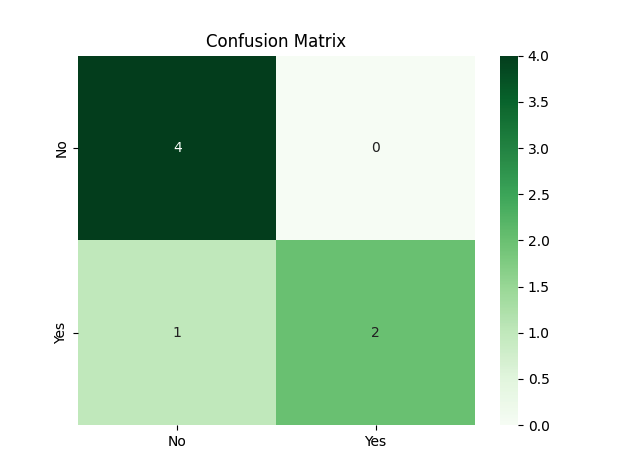

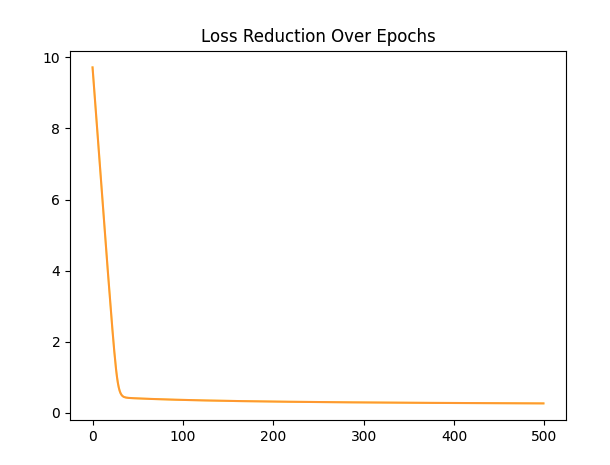

Github:[GIT](https://github.com/harshith-nikhil/nna1)